# Coursera Spacecraft Dynamics and Control - Kinematics
## Module 3
## Concept Check 8 - EP Differential Kinematic Equations

In [1]:
import numpy as np
import math
import sys
from scipy.integrate import odeint
import matplotlib.pyplot as plt

sys.path.append('../')

import attitude_math as am

### Problem 1
Question 1
Given 
$\beta(0) = (0.408248, 0., 0.408248, 0.816497)$, write a program to integrate the EP differential kinematic equations. Assume the body angular velocity vector of the craft is given through the $B\omega$ frame components as 

$B\omega = \begin{bmatrix} \sin(0.1t) \\ 0.01 \\ \cos(0.1t) \end{bmatrix} * 20\text{deg/s}$.

Enter below the norm $\sqrt{{\beta_1}^2+{\beta_2}^2+{\beta_3}^2}$ for the EP vector component at 42 seconds.


[ 0.57199323  0.39893261  0.58539801 -0.41350459]
1.000000180512005
[[ 4.08248000e-01  0.00000000e+00  4.08248000e-01  8.16497000e-01]
 [ 4.06815156e-01  6.98275479e-04  4.08254461e-01  8.17208197e-01]
 [ 4.05381115e-01  1.39725850e-03  4.08261146e-01  8.17916276e-01]
 ...
 [ 5.71420588e-01  4.00562676e-01  5.84603835e-01 -4.13843462e-01]
 [ 5.71662787e-01  3.99199030e-01  5.85585705e-01 -4.13438235e-01]
 [ 5.71904216e-01  3.97834567e-01  5.86565540e-01 -4.13030377e-01]]
0.9999999999999998


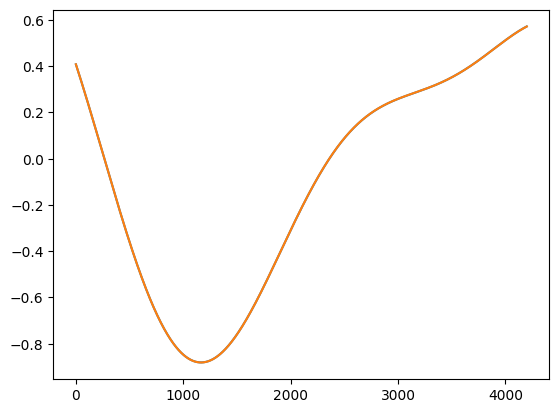

In [2]:
def F(q, t):
    omega = np.array([np.sin(0.1*t), 0.01, np.cos(0.1*t)])*np.deg2rad(20.)
    bdot = am.quat_omega_DKE(q, omega)
    return bdot

result = odeint(F,
                [0.408248, 0.0, 0.408248, 0.816497],
                np.arange(0.0,42.0,.01))
print(result[-1])
print(np.linalg.norm(result[-1,:]))
plt.plot(result[:,0])

result = am.normalized_integrator(F,
                [0.408248, 0.0, 0.408248, 0.816497],
                0.0,42.0,.01)
print(result)
print(np.linalg.norm(result[-1,:]))
plt.plot(result[:,0])
